In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import math
import copy 
from matplotlib.gridspec import GridSpec

plt.style.use('seaborn')

## 1. Single Frequency:
### 1.1. Taking FFT for a 5Hz signal (N = 100) as the real component. 

In [80]:
N = 100

f1 = 5
t = np.linspace(0, 1, N)
s = np.cos(f1 * 2 * np.pi * t)

fft1 = np.fft.fftshift(np.fft.fft(s))
freqs = np.linspace(-N/2, N/2 - 1, num=N)

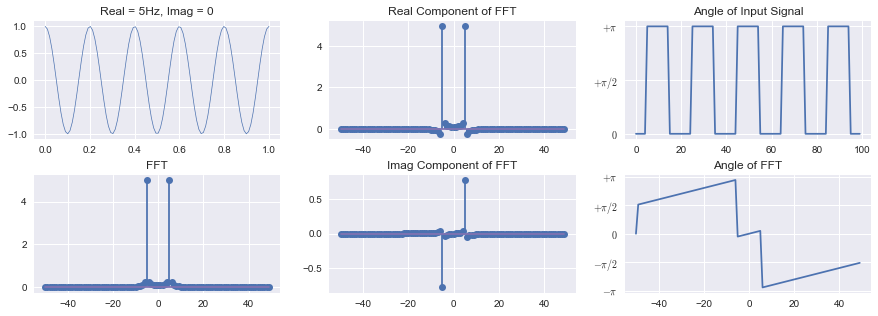

In [81]:
# Setting up the plot surface
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s, linewidth = 0.7)
ax0.set_title('Real = '+ str(f1) + 'Hz, Imag = 0')

ax1 = fig.add_subplot(gs[1, 0])
ax1.stem(freqs, (np.abs(fft1*10) / N), use_line_collection = True)
ax1.set_title('FFT')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, (fft1.real*10 / N), use_line_collection = True)
ax2.set_title('Real Component of FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.stem(freqs, (fft1.imag*10 / N), use_line_collection = True)
ax3.set_title('Imag Component of FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.plot(range(N), np.angle(s))
ax4.set_yticks([0, np.pi/2, np.pi], minor=False)
ax4.set_yticklabels([r'$0$', r'$+\pi/2$', r'$+\pi$'],  fontdict=None, minor=False)
ax4.set_title('Angle of Input Signal')

ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(freqs, np.angle(fft1))
ax5.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax5.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax5.set_title('Angle of FFT')


plt.show()

In [28]:
fs=32*fc
df=fs/N
plot(f,phase); %phase vs frequencies

SyntaxError: invalid syntax (<ipython-input-28-7192676ebec2>, line 3)

### 1.2. Taking FFT for a 5Hz signal (N = 100) as the imaginary component. 

In [84]:
s_i = [complex(a,b) for a,b in zip(np.zeros(N) ,s)]
fft2 = np.fft.fftshift(np.fft.fft(s_i))

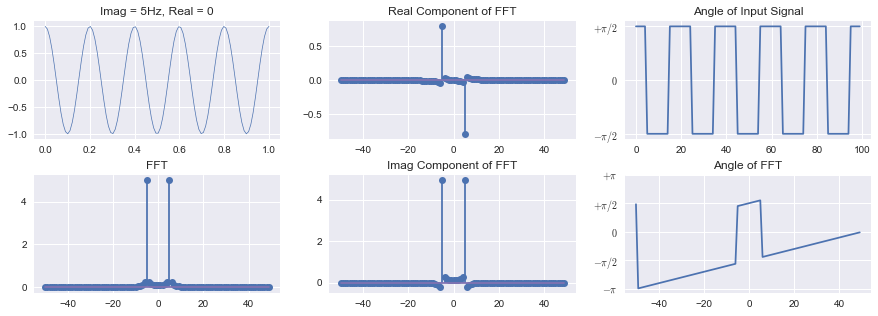

In [85]:
# Setting up the plot surface
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s, linewidth = 0.7)
ax0.set_title('Imag = '+ str(f1) + 'Hz, Real = 0')

ax1 = fig.add_subplot(gs[1, 0])
ax1.stem(freqs, (np.abs(fft2*10) / N), use_line_collection = True)
ax1.set_title('FFT')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, (fft2.real*10 / N), use_line_collection = True)
ax2.set_title('Real Component of FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.stem(freqs, (fft2.imag*10 / N), use_line_collection = True)
ax3.set_title('Imag Component of FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.plot(range(N), np.angle(s_i))
ax4.set_yticks([-np.pi/2, 0, np.pi/2,], minor=False)
ax4.set_yticklabels([r'$-\pi/2$', r'$0$', r'$+\pi/2$'],  fontdict=None, minor=False)
ax4.set_title('Angle of Input Signal')

ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(freqs, np.angle(fft2))
ax5.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax5.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax5.set_title('Angle of FFT')

plt.show()

### Conclusion: 
1. Real component is mostly positive, Imag is both positive and negative 
2. Imag component is mostly positive, Real is both positive and negative 

When the real component and the imaginary component of the input signal are interchanged: The real component and the imaginary component also interchange in the frequency spectrum 

## 2. Multiple Frequency:
### 2.1. Taking FFT for a 5Hz signal (N = 100) as the real component and 10Hz as the imaginary component. 

In [88]:
N = 100

f1 = 5
f2 = 10

t = np.linspace(0, 1, N)
s1 = np.sin(f1 * 2 * np.pi * t) 
c1 = np.sin(f2 * 2 * np.pi * t) 
com_1 = [complex(a,b) for a,b in zip(s1 ,c1)]

fft_1 = np.fft.fftshift(np.fft.fft(com_1))
freqs = np.linspace(-N/2, N/2 - 1, num=N)

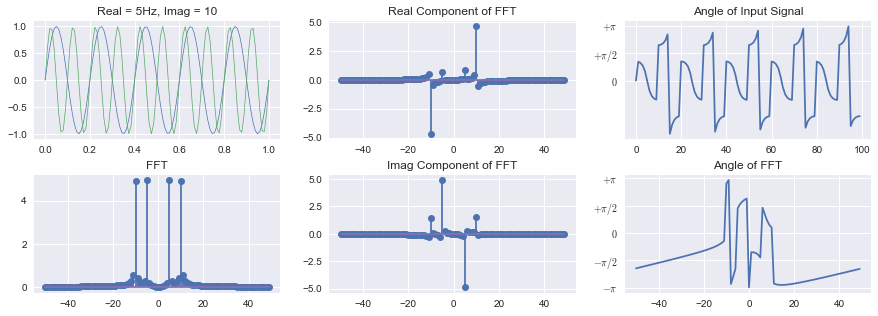

In [89]:
# Setting up the plot surface
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s1, linewidth = 0.7)
ax0.plot(t, c1, linewidth = 0.7)
ax0.set_title('Real = '+ str(f1) + 'Hz, Imag = '+ str(f2))

ax1 = fig.add_subplot(gs[1, 0])
ax1.stem(freqs, (np.abs(fft_1*10) / N), use_line_collection = True)
ax1.set_title('FFT')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, (fft_1.real*10 / N), use_line_collection = True)
ax2.set_title('Real Component of FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.stem(freqs, (fft_1.imag*10 / N), use_line_collection = True)
ax3.set_title('Imag Component of FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.plot(range(N), np.angle(com_1))
ax4.set_yticks([0, np.pi/2, np.pi], minor=False)
ax4.set_yticklabels([r'$0$', r'$+\pi/2$', r'$+\pi$'],  fontdict=None, minor=False)
ax4.set_title('Angle of Input Signal')

ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(freqs, np.angle(fft_1))
ax5.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax5.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax5.set_title('Angle of FFT')

plt.show()

### 2.2. Taking FFT for a 5Hz signal (N = 100) as the imaginary component and 10Hz as the real component. 

In [90]:
f_1 = 10
f_2 = 5

t = np.linspace(0, 1, N)
s2 = np.sin(f_1 * 2 * np.pi * t) 
c2 = np.sin(f_2 * 2 * np.pi * t) 
com_2 = [complex(a,b) for a,b in zip(s1 ,c1)]

fft_2 = np.fft.fftshift(np.fft.fft(com_2))

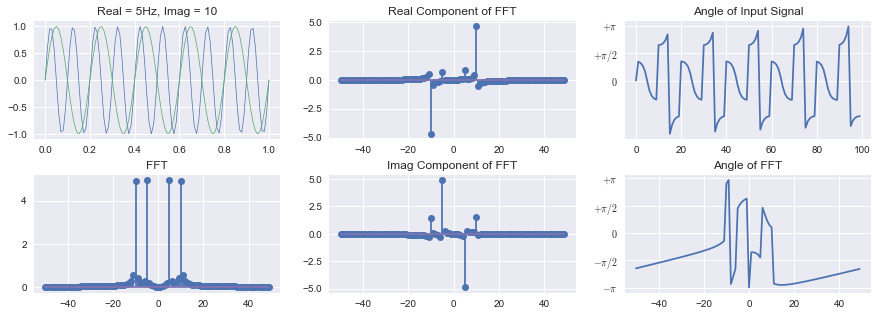

In [91]:
# Setting up the plot surface
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s2, linewidth = 0.7)
ax0.plot(t, c2, linewidth = 0.7)
ax0.set_title('Real = '+ str(f1) + 'Hz, Imag = '+ str(f2))

ax1 = fig.add_subplot(gs[1, 0])
ax1.stem(freqs, (np.abs(fft_2*10) / N), use_line_collection = True)
ax1.set_title('FFT')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, (fft_2.real*10 / N), use_line_collection = True)
ax2.set_title('Real Component of FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.stem(freqs, (fft_2.imag*10 / N), use_line_collection = True)
ax3.set_title('Imag Component of FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.plot(range(N), np.angle(com_2))
ax4.set_yticks([0, np.pi/2, np.pi], minor=False)
ax4.set_yticklabels([r'$0$', r'$+\pi/2$', r'$+\pi$'],  fontdict=None, minor=False)
ax4.set_title('Angle of Input Signal')

ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(freqs, np.angle(fft_2))
ax5.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax5.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax5.set_title('Angle of FFT')

plt.show()

### Conclusion: 
1. Real component is mostly positive, Imag is both positive and negative 
2. Imag component is mostly positive, Real is both positive and negative 

When the real component and the imaginary component of the input signal are interchanged: The real component and the imaginary component also interchange in the frequency spectrum 

## 3. Effects of changes in Time Domain:
### 3.1. Shifting:

In [92]:
N = 100
f = 10

t = np.linspace(0, 1, N)
s = np.sin(f * 2 * np.pi * t) 

fft = np.fft.fftshift(np.fft.fft(s))

s_11 = s.copy()
shft_f = 10

s_11[0:shft_f] = 0
s_11[shft_f:N] = s[0:(100-shft_f)]
    
fft_11 = np.fft.fftshift(np.fft.fft(s_11))
freqs = np.linspace(-N/2, N/2 - 1, num=N)

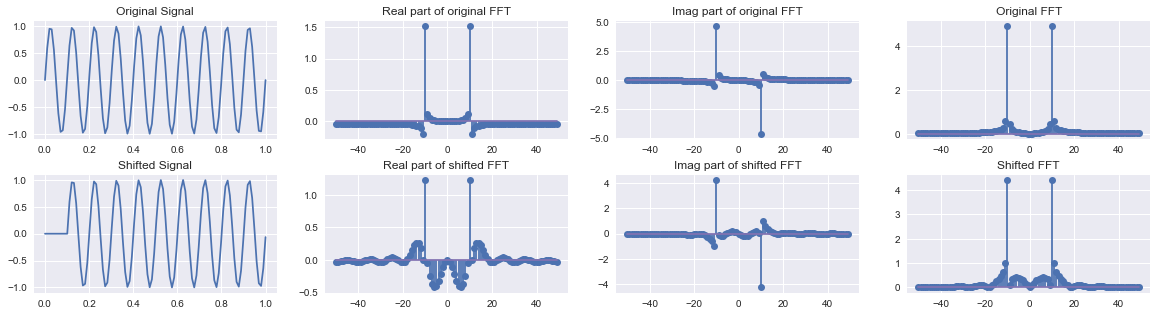

In [98]:
# Setting up the plot surface
fig = plt.figure(figsize=(20, 5))
gs = GridSpec(nrows=2, ncols=4)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s)
ax0.set_title('Original Signal')

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(t, s_11)
ax1.set_title('Shifted Signal')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, fft.real*10 / N, use_line_collection = True)
ax2.set_title('Real part of original FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.stem(freqs, fft_11.real*10 / N, use_line_collection = True)
ax3.set_title('Real part of shifted FFT')

ax1 = fig.add_subplot(gs[0, 2])
ax1.stem(freqs, fft.imag*10 / N, use_line_collection = True)
ax1.set_title('Imag part of original FFT')

ax0 = fig.add_subplot(gs[1, 2])
ax0.stem(freqs, fft_11.imag*10 / N, use_line_collection = True)
ax0.set_title('Imag part of shifted FFT')

ax1 = fig.add_subplot(gs[0, 3])
ax1.stem(freqs, np.abs(fft)*10 / N, use_line_collection = True)
ax1.set_title('Original FFT')

ax0 = fig.add_subplot(gs[1, 3])
ax0.stem(freqs, np.abs(fft_11)*10 / N, use_line_collection = True)
ax0.set_title('Shifted FFT')
plt.show()


### 3.2. Scaling: 

In [94]:
def rescale(arr, factor=2):
    n = len(arr)
    return np.interp(np.linspace(0, n, factor*n+1), np.arange(n), arr)

In [95]:
N = 100
f = 10

t = np.linspace(0, 1, N)
s = np.sin(f * 2 * np.pi * t) 

fft = np.fft.fftshift(np.fft.fft(s))

scaling_f = 5
s_12 = rescale(s, scaling_f).tolist()  
fft_12 = np.fft.fftshift(np.fft.fft(s_12))
t_ = np.linspace(0, (scaling_f*N+1)/N, scaling_f*N+1)
freqs = np.linspace(-N/2, N/2 - 1, num=N)
freqs_ = np.linspace(-(scaling_f*N+1)/2, (scaling_f*N+1)/2 - 1, num=scaling_f*N+1)

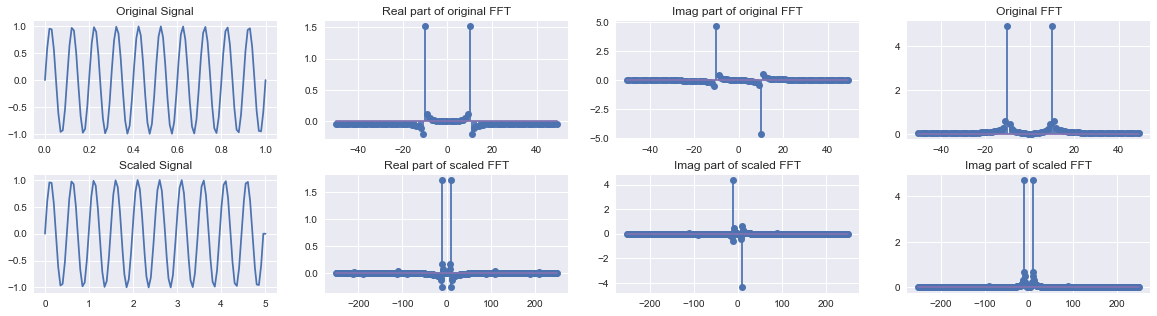

In [99]:
# Setting up the plot surface
fig = plt.figure(figsize=(20, 5))
gs = GridSpec(nrows=2, ncols=4)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s)
ax0.set_title('Original Signal')

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(t_, s_12)
ax1.set_title('Scaled Signal')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, fft.real*10 / N, use_line_collection = True)
ax2.set_title('Real part of original FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.stem(freqs_, fft_12.real*10 / (N*scaling_f), use_line_collection = True)
ax3.set_title('Real part of scaled FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.stem(freqs, fft.imag*10 / N, use_line_collection = True)
ax4.set_title('Imag part of original FFT')

ax5 = fig.add_subplot(gs[1, 2])
ax5.stem(freqs_, fft_12.imag*10 / (N*scaling_f), use_line_collection = True)
ax5.set_title('Imag part of scaled FFT')

ax6 = fig.add_subplot(gs[0, 3])
ax6.stem(freqs, np.abs(fft)*10 / N, use_line_collection = True)
ax6.set_title('Original FFT')

ax7 = fig.add_subplot(gs[1, 3])
ax7.stem(freqs_, np.abs(fft_12)*10 / (N*scaling_f), use_line_collection = True)
ax7.set_title('Imag part of scaled FFT')
plt.show()

## 4. Effect of changes in Frequency domain:
### 4.1. Shifting:

In [48]:
N = 100
f = 10

t = np.linspace(0, 1, N)
s = np.sin(f * 2 * np.pi * t) 

fft = np.fft.fft(s)

fft_1 = fft.copy()
shft_f = 20

n1 = int(N/2)
sf1 = int(shft_f/2)

fft_1[0 : (n1 - sf1)] = fft[sf1 : n1]
fft_1[n1 - sf1 : n1 + sf1] = 0
fft_1[n1 + sf1 : N] = fft[n1 : N - sf1]

s_1 = np.fft.ifft(fft_1)

C:\Users\samik\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


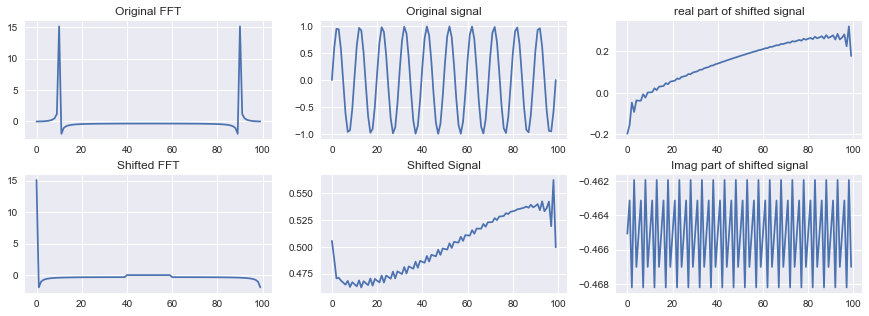

In [49]:
# Setting up the plot surface
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace = 0.2, hspace = 0.3)

ax2 = fig.add_subplot(gs[0, 0])
ax2.plot(range(N), fft)
ax2.set_title('Original FFT')

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(range(N), fft_1)
ax2.set_title('Shifted FFT')

ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(range(N), s)
ax1.set_title('Original signal')

ax0 = fig.add_subplot(gs[1, 1])
ax0.plot(range(N), np.abs(s_1))
ax0.set_title('Shifted Signal')

ax1 = fig.add_subplot(gs[0, 2])
ax1.plot(range(N), s_1.real)
ax1.set_title('real part of shifted signal')

ax0 = fig.add_subplot(gs[1, 2])
ax0.plot(range(N), s_1.imag)
ax0.set_title('Imag part of shifted signal')

plt.show()
